In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import community as community_louvain

import matplotlib.cm as cm
import torch

import warnings
warnings.filterwarnings('ignore')

### PubMed

In [2]:
path = 'pubmed_expln_graphs/vae/'

In [3]:
required_edges = [('gene', 'gene'),
 ('gene', 'disease'),
 ('disease', 'disease'),
 ('chemical', 'gene'),
 ('chemical', 'disease'),
 ('chemical','chemical'),
 ('chemical','species'),
 ('species','gene'), 
 ('species','disease'),
 ('species','species' )]

In [4]:
def get_node_type(node_type):
    if node_type == 1:
        return 'disease'
    elif node_type == 0:
        return 'gene'
    elif node_type == 2:
        return 'chemical'
    elif node_type == 3:
        return 'species'

In [5]:
def remove_edges(graph):
    

    #Get small graph edges
    edges = [e for e in graph.edges]
    
    node_types=nx.get_node_attributes(graph, "class")
   
    source,dest =list(map(list, zip(*edges)))
    remaining_edges = []
    
    for i in range(len(edges)):
        source_node_type = get_node_type(node_types[source[i]])
        dest_node_type = get_node_type(node_types[dest[i]])
        
        if not (source_node_type,dest_node_type) in required_edges:
            remaining_edges.append((source[i],dest[i]))
    
    graph.remove_edges_from(remaining_edges)        
    graph.remove_nodes_from(list(nx.isolates(graph)))

    return graph

In [6]:
def plot_graph(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show() 

In [7]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [8]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

Explanation graph of class 6

In [9]:
class6_graph = nx.read_gexf(path+'sync893086233433/sync893086233433_G27.gexf')

In [10]:
syn_class_path = path + 'sync893086233433/sync893086233433_node_class27.pt'
node_class_syn = torch.load(syn_class_path).detach().numpy()
nx.set_node_attributes(class6_graph, dict(zip(class6_graph.nodes(), node_class_syn)), 'class')
class6 = remove_edges(class6_graph)

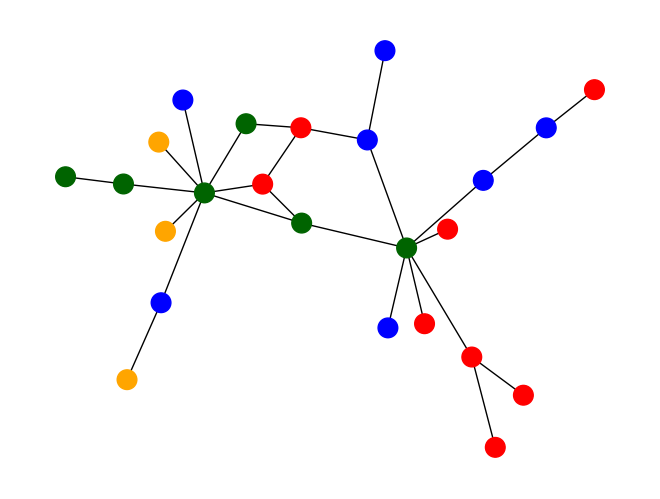

In [14]:
plot_graph(class6)

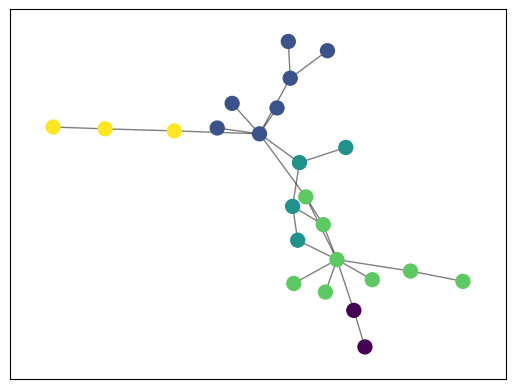

[{'0', '10', '17', '2', '26', '29', '9'},
 {'11', '13', '25', '6'},
 {'1', '15', '18', '19', '22', '27', '28', '7'},
 {'16', '20', '4'},
 {'23', '8'}]

In [12]:
detect_community(class6)
list_com= nx.community.louvain_communities(class6, seed=123)
list_com

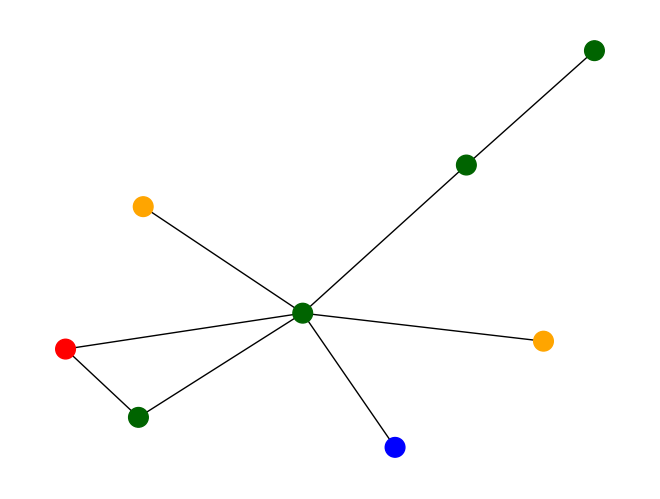

In [13]:
#Largest substructure
H = class6.subgraph(max(list_com, key=len))
plot_graph(H)